In [1530]:
import numpy as np
from matplotlib import pyplot as plt

we are pertubing a hamiltonian and comparing the entries of density matrices wriiten for in perturbed bases

## Making Unperturbed matrix H

In [1531]:
x = np.array([1+3j,2+2j,3+1j])
A = np.random.normal(size=(3,3))
B = np.random.normal(size=(3,3))
C = A + 1j*B
H = np.matrix(C).H @ C

In [1532]:
eig, U = np.linalg.eig(H)

In [1533]:

def calculate_pert(X):
    A = np.random.normal(size=(3,3))
    B = np.random.normal(size=(3,3))
    C = A + 1j*B
    d = np.matrix(C).H @ C
    Hd = H + .01*d
    eigd, Ud = np.linalg.eig(Hd)
    V = np.linalg.inv(Ud) @ U
    Vt = np.linalg.inv(V)
    Xd = Vt @ X @ V
    F = Xd
    f = F.flatten()
    return f


In [1534]:
X = np.outer(x,x)

In [1535]:

P = np.array([X.flatten()])
for i in range(100):
    pert = calculate_pert(X)
    
    P = np.concatenate((P,pert))

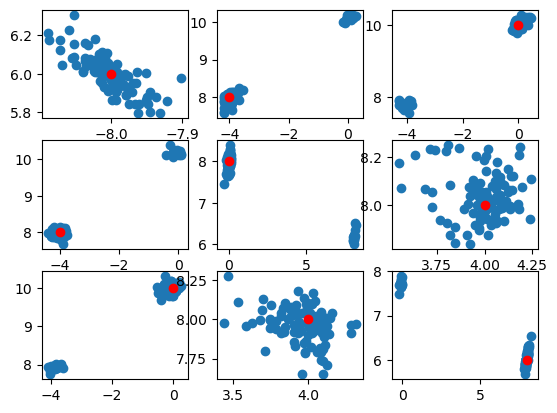

In [1536]:


data = P[1:,:]
x=[]
y=[]
for k in range(9):
    real = [z.real for z in data[:,k]]
    imag = [z.imag for z in data[:,k]]
    x.append(real)
    y.append(imag)

Xf = X.flatten()

re = [z.real for z in Xf]
im = [z.imag for z in Xf]

re[0]

figure, axis = plt.subplots(3,3)

axis[0,0].scatter(x[0],y[0])
axis[0,0].plot(re[0],im[0], 'ro')


axis[0,1].scatter(x[1],y[1])
axis[0,1].plot(re[1],im[1], 'ro')

axis[0,2].scatter(x[2],y[2])
axis[0,2].plot(re[2],im[2], 'ro')

axis[1,0].scatter(x[3],y[3])
axis[1,0].plot(re[3],im[3], 'ro')

axis[1,1].scatter(x[4],y[4])
axis[1,1].plot(re[4],im[4], 'ro')

axis[1,2].scatter(x[5],y[5])
axis[1,2].plot(re[5],im[5], 'ro')

axis[2,0].scatter(x[6],y[6])
axis[2,0].plot(re[6],im[6], 'ro')

axis[2,1].scatter(x[7],y[7])
axis[2,1].plot(re[7],im[7], 'ro')

axis[2,2].scatter(x[8],y[8])
axis[2,2].plot(re[8],im[8], 'ro')




In [1537]:
samp_mean = np.mean(data, axis=0)

In [1538]:
X.flatten()

array([-8. +6.j, -4. +8.j,  0.+10.j, -4. +8.j,  0. +8.j,  4. +8.j,
        0.+10.j,  4. +8.j,  8. +6.j])

In [1539]:
np.max(np.abs(samp_mean - X.flatten()))

1.1611187574955129

In [1540]:
eig

array([0.6826549 -5.40493492e-16j, 6.50266586+3.33676820e-16j,
       8.81962658-7.10408715e-17j])

calculate correlation between the different entries. see if some entries are more correlated across distributions. figure out which matrices split which dont. with more variance, would the non splitters split?